In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df_breastCancer = pd.read_csv("https://raw.githubusercontent.com/hetasks/loppuprojektiSyvaOppiminen/main/Breast_Cancer.csv", sep=",")


Tutkitaan sarakkeita otsikkotasolla mitä datasta löytyy.

In [3]:
df_breastCancer.columns.tolist() 

['Age',
 'Race',
 'Marital Status',
 'T Stage ',
 'N Stage',
 '6th Stage',
 'differentiate',
 'Grade',
 'A Stage',
 'Tumor Size',
 'Estrogen Status',
 'Progesterone Status',
 'Regional Node Examined',
 'Reginol Node Positive',
 'Survival Months',
 'Status;']

In [4]:
df_breastCancer.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status;
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive;
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive;
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive;
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive;
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive;


Seuraavassa nähdään tarkemmin kuinka monta saraketta ja kuinka monta riviä data sisältää. Nähdään myös, että osa datasta on numeerista dataa ja osa on datatyypiltään object.

In [5]:
df_breastCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

Tarkistetaan vielä, että ei ole tyhjiä arvoja.

In [6]:
df_breastCancer.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status;                   0
dtype: int64

In [7]:
df_breastCancer['Status;'].value_counts()

Alive;    3398
Dead;      607
Alive       10
Dead         9
Name: Status;, dtype: int64

Yllä olevasta nähdään, että sarakkeessa 'Status' on kirjattu arvoja hieman eri tavoilla. Muutetaan nämä niin, että sarakkeiden arvoista poistetaan ylimääräiset kaksoispisteet.

In [8]:
df_breastCancer['Status;'] = df_breastCancer['Status;'].replace(['Alive;'], 'Alive')

In [9]:
df_breastCancer['Status;'] = df_breastCancer['Status;'].replace(['Dead;'], 'Dead')

In [10]:
df_breastCancer['Status;'].value_counts()

Alive    3408
Dead      616
Name: Status;, dtype: int64

Nyt sarakkeessa 'Status' arvo 0 tarkoittaa, että henkilö on elossa tarkkailuajan aikana ja arvo 1 tarkoittaa, että henkilö on kuollut tarkkailuajan kuluessa. 

In [11]:
df_breastCancer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

Tarkastellaan sarakkeita numeerisena datana.

In [12]:
df_breastCancer.describe().round(2)

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.00,4024.00,4024.00,4024.00,4024.00
mean,53.97,30.47,14.36,4.16,71.30
std,8.96,21.12,8.10,5.11,22.92
min,30.00,1.00,1.00,1.00,1.00
25%,47.00,16.00,9.00,1.00,56.00
50%,54.00,25.00,14.00,2.00,73.00
75%,61.00,38.00,19.00,5.00,90.00
max,69.00,140.00,61.00,46.00,107.00


In [13]:
df_breastCancer.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status;
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [14]:
df_breastCancer

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status;
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


Koska koneoppisen algoritmit ymmärtävät suurimmaksi osaksi numeerista dataa, niin muutetaan object-tyyppiset sarakkeet numeerisiksi. Käytetään OrdinalEncoderia, koska sen kanssa voidaan käyttää "encoded_missing_value", joka varmistaa ettei opetusdatan ulkopuolella esiinnhy ennennäkemätöntä dataa. 

In [15]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()


df_breastCancer[['Race','Marital Status','T Stage ','N Stage','6th Stage','differentiate','Grade','A Stage','Estrogen Status','Progesterone Status','Status;']] = enc.fit_transform(df_breastCancer[['Race','Marital Status','T Stage ','N Stage','6th Stage','differentiate','Grade','A Stage','Estrogen Status','Progesterone Status','Status;']])


enc.set_params(encoded_missing_value=-1).fit_transform(df_breastCancer[['Race','Marital Status','T Stage ','N Stage','6th Stage','differentiate','Grade','A Stage','Estrogen Status','Progesterone Status','Status;']])



array([[2., 1., 0., ..., 1., 1., 0.],
       [2., 1., 1., ..., 1., 1., 0.],
       [2., 0., 2., ..., 1., 1., 0.],
       ...,
       [2., 1., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [2., 1., 1., ..., 1., 1., 0.]])

Erotellaan datasta opetussetti ja testisetti. Opetusdataa varten irrotetaan alkuperäisestä datasta 80 % osajoukko. Sen jälkeen otetaan testidata niin, että poisluetaan opetusdata testidatasta.

In [16]:
df_train = df_breastCancer.sample(frac=0.8, random_state=42)
df_test = df_breastCancer.drop(df_train.index)

In [17]:
print("Treenidimensiot:", df_train.shape, "Testidimensiot", df_test.shape)

Treenidimensiot: (3219, 16) Testidimensiot (805, 16)


Otetaan mallinnukseen muuttujat df_trainista eli opetusdatasta.

In [18]:
X_train = df_train.iloc[:,0:].to_numpy()
y_train = df_train.iloc[:,15].to_numpy()


print(X_train.shape, y_train.shape)

(3219, 16) (3219,)


Ylläolevasta nähdään, että opetusdataa on 3219 riviä ja siellä on 16 muuttujaa. Lisäksi vastauksia (y_train) on sama 3219.

Seuraavaksi tehdään mallinnusta. Otetaan sitä varten ensiksi kirjastoja käyttöön.

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [20]:
model = Sequential()
model.add(Dense(30, input_dim=16, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                510       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 5)                 80        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,061
Trainable params: 1,061
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

In [23]:
model.fit(X_train, y_train, validation_split=0.2, epochs=25, batch_size=12)

Epoch 1/25
215/215 [==============================] - 2s 6ms/step - loss: 0.2969 - accuracy: 0.8944 - val_loss: 0.3206 - val_accuracy: 0.8866
Epoch 2/25
215/215 [==============================] - 1s 5ms/step - loss: 0.2612 - accuracy: 0.9045 - val_loss: 0.2892 - val_accuracy: 0.8960
Epoch 3/25
215/215 [==============================] - 1s 5ms/step - loss: 0.2402 - accuracy: 0.9072 - val_loss: 0.2832 - val_accuracy: 0.8975
Epoch 4/25
215/215 [==============================] - 1s 5ms/step - loss: 0.2193 - accuracy: 0.9173 - val_loss: 0.2402 - val_accuracy: 0.9084
Epoch 5/25
215/215 [==============================] - 1s 5ms/step - loss: 0.1846 - accuracy: 0.9313 - val_loss: 0.2018 - val_accuracy: 0.9130
Epoch 6/25
215/215 [==============================] - 1s 5ms/step - loss: 0.1391 - accuracy: 0.9464 - val_loss: 0.1467 - val_accuracy: 0.9689
Epoch 7/25
215/215 [==============================] - 1s 5ms/step - loss: 0.0907 - accuracy: 0.9713 - val_loss: 0.0783 - val_accuracy: 0.9752
Epoch 

Seuraavaksi jaetaan vielä testidata kahteen eri osajoukkoon. Varmistetaan train_test_splitin stratified-parametrin avulla, että kaikissa spliteissä on kummankin kategorian havaintoja samassa suhteessa.

In [24]:
df_test_eval = df_test.sample(frac=0.20, random_state=42)
df_test_unseen = df_test.drop(df_test_eval.index)

In [25]:
X_test_eval = df_test_eval.iloc[:,0:].to_numpy()
y_test_eval = df_test_eval.iloc[:,15].to_numpy()

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test_eval, y_train, y_test_eval = train_test_split(X_test_eval, y_test_eval, test_size=0.33, random_state=42, stratify=y_test_eval)

X_train

y_train

X_test_eval

y_test_eval


train_test_split(y_test_eval, shuffle=False)


[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.])]

Evaluointidatan joukko on 161:

In [27]:
print(X_test_eval.shape, y_test_eval.shape)

(54, 16) (54,)


In [28]:
_, accuracy = model.evaluate(X_test_eval, y_test_eval)
print('Accuracy: %.2f' % (accuracy*100))

2/2 [==============================] - 0s 4ms/step - loss: 2.4427e-04 - accuracy: 1.0000
Accuracy: 100.00


Yllä nähdään, että tarkkuus tällä testidatalla on 100 %.

Seuraavaksi mennään ennustuksiin ja tehdään se ennennäkemättömällä datalla.

In [29]:
X_test_unseen = df_test_unseen.iloc[:,0:].to_numpy()
y_test_unseen = df_test_unseen.iloc[:,15].to_numpy()

In [30]:
print(X_test_unseen.shape, y_test_unseen.shape)

(644, 16) (644,)


Sovellusdataa tässä kohtaa ennennäkemättömällä datalla vajaa 650.

In [31]:
preds = model.predict(X_test_unseen)

Seuraavasta nähdään todennäköisyydet kullekin havainolle. Jos arvo on enemmän kuin 0.5, niin silloin ennustamisessa oltaisiin varmoja siitä, että syöpään sairastunut on kuollut.

In [32]:
preds

array([[4.77498579e-05],
       [5.04380478e-05],
       [3.22356777e-06],
       [4.09498789e-05],
       [8.39007771e-05],
       [1.11276482e-03],
       [4.24500962e-04],
       [1.62512461e-05],
       [5.84535264e-05],
       [9.98947561e-01],
       [1.04340897e-05],
       [2.99596945e-06],
       [9.95084822e-01],
       [2.89513864e-05],
       [9.99744236e-01],
       [9.99188364e-01],
       [1.55155649e-05],
       [2.10517028e-05],
       [9.09293376e-05],
       [9.68735403e-05],
       [1.03164864e-04],
       [9.99671578e-01],
       [4.37800099e-06],
       [2.99377352e-05],
       [2.47567859e-05],
       [4.37767540e-06],
       [2.31429185e-05],
       [5.95486272e-05],
       [1.48273202e-05],
       [1.32513533e-05],
       [5.45451512e-05],
       [1.11942963e-05],
       [9.99829412e-01],
       [5.03662386e-06],
       [1.00582556e-05],
       [7.66460744e-06],
       [3.11808835e-05],
       [1.29585344e-04],
       [2.75752664e-05],
       [2.17201705e-06],


In [33]:
preds_classes = (preds > 0.5).astype(int)

In [34]:
print(preds_classes)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]


In [35]:
print(preds_classes.shape, np.squeeze(preds_classes).shape, preds_classes[:,0].shape)

(644, 1) (644,) (644,)


Mallin tarkkuuden laskeminen

In [36]:
acc = np.count_nonzero(preds_classes[:,0] == y_test_unseen)/len(y_test_unseen)

In [37]:
print(f"Accuracy with unseen {len(y_test_unseen)} samples: {acc*100:.3f}")

Accuracy with unseen 644 samples: 100.000


Tästä siis nähdään, että tarkkuus on sama kuin opetusdatassa.

Etsitään korrelaatiota 'Statuksen' suhteen. Arvot voivat olla välillä pienimmillään -1 ja suurimmillaan 1. Mitä lähempänä arvoa 1 ollaan, sen suurempi korrelaatio. Näissä tuloksissa ei näy vahvaa korrelaatiota minkään muun muuttujan kanssa.

<AxesSubplot:>

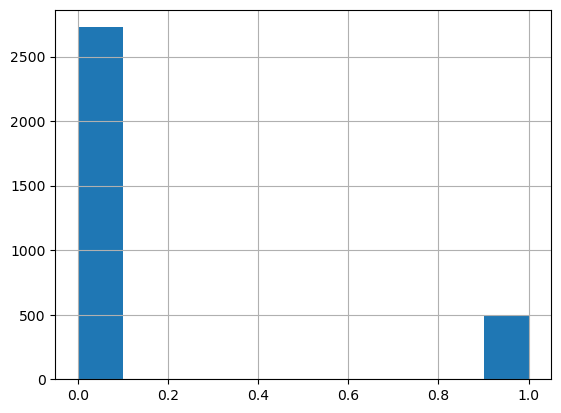

In [38]:
df_train['Status;'].hist()

In [39]:
corr_matrix = df_train.corr()
corr_matrix["Status;"].sort_values(ascending=False)

Status;                   1.000000
Reginol Node Positive     0.285805
N Stage                   0.283974
6th Stage                 0.281160
T Stage                   0.164748
Tumor Size                0.153339
Grade                     0.121009
Age                       0.056478
Regional Node Examined    0.055235
Marital Status            0.047105
differentiate            -0.015913
Race                     -0.066993
A Stage                  -0.101501
Progesterone Status      -0.182171
Estrogen Status          -0.185358
Survival Months          -0.491481
Name: Status;, dtype: float64

Tutkitaan vielä tarkemmin näiden muuttujien 6 ylimpänä olevaa arvoa selviytymiskuukausien suhteen.

array([[<AxesSubplot:xlabel='6th Stage', ylabel='6th Stage'>,
        <AxesSubplot:xlabel='Reginol Node Positive', ylabel='6th Stage'>,
        <AxesSubplot:xlabel='N Stage', ylabel='6th Stage'>,
        <AxesSubplot:xlabel='T Stage ', ylabel='6th Stage'>,
        <AxesSubplot:xlabel='Tumor Size', ylabel='6th Stage'>,
        <AxesSubplot:xlabel='Grade', ylabel='6th Stage'>],
       [<AxesSubplot:xlabel='6th Stage', ylabel='Reginol Node Positive'>,
        <AxesSubplot:xlabel='Reginol Node Positive', ylabel='Reginol Node Positive'>,
        <AxesSubplot:xlabel='N Stage', ylabel='Reginol Node Positive'>,
        <AxesSubplot:xlabel='T Stage ', ylabel='Reginol Node Positive'>,
        <AxesSubplot:xlabel='Tumor Size', ylabel='Reginol Node Positive'>,
        <AxesSubplot:xlabel='Grade', ylabel='Reginol Node Positive'>],
       [<AxesSubplot:xlabel='6th Stage', ylabel='N Stage'>,
        <AxesSubplot:xlabel='Reginol Node Positive', ylabel='N Stage'>,
        <AxesSubplot:xlabel='N Stage',

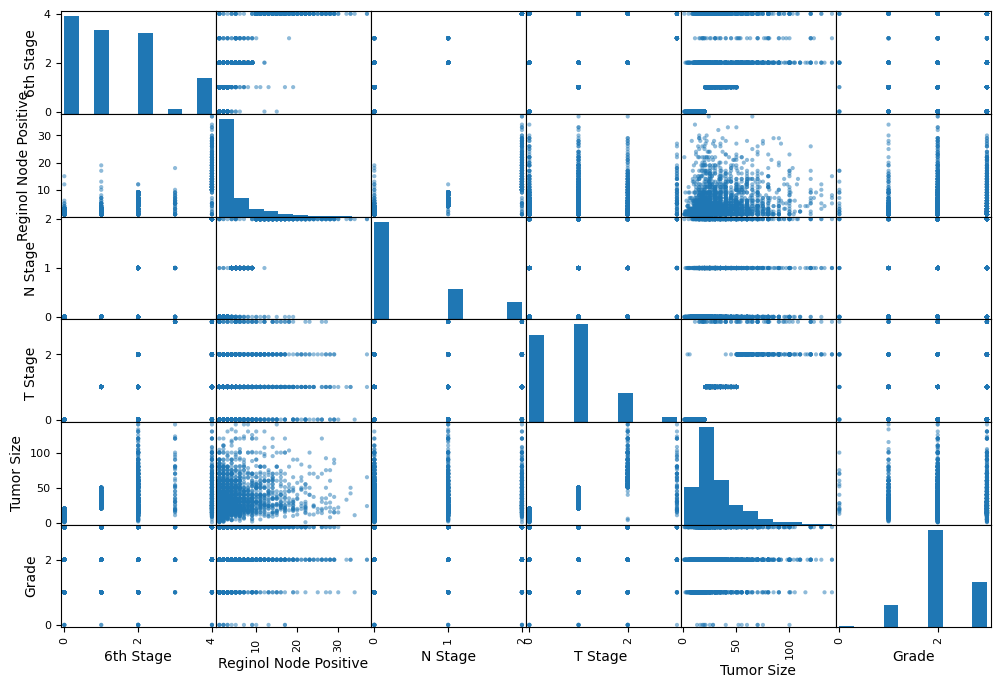

In [40]:
from pandas.plotting import scatter_matrix

attributes = ["6th Stage", "Reginol Node Positive", "N Stage", "T Stage ","Tumor Size","Grade"]
scatter_matrix(df_train[attributes], figsize=(12, 8))

Eniten kuolleisuutta tuntuu vastaavan '6th Stage'

Seuraavassa kuvassa katsotaan tarkemmin näiden korrelaatiota ja tämän perusteella nähdään, että korrelaatiota on, mutta ei kovin merkittävästi.

<AxesSubplot:xlabel='Status;', ylabel='6th Stage'>

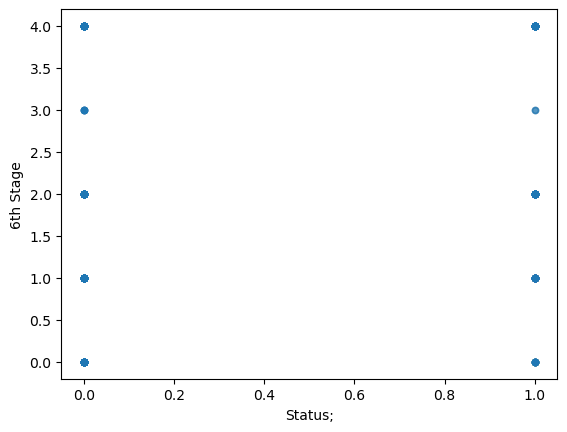

In [41]:
df_train.plot(kind="scatter", x="Status;", y="6th Stage", alpha=0.1)

Seuraavassa vielä nähdään, että miten malli on ennustanut arvoa ja onko se mennyt oikein (True=1, False=0)

In [42]:
for i in range(10):
    print('%s => %s (expected %d)' % (X_test_unseen[i].tolist(), preds_classes[i], y_test_unseen[i]))

[50.0, 2.0, 1.0, 1.0, 1.0, 2.0, 0.0, 2.0, 1.0, 35.0, 1.0, 1.0, 14.0, 5.0, 62.0, 0.0] => [0] (expected 0)
[47.0, 2.0, 1.0, 1.0, 0.0, 1.0, 1.0, 3.0, 1.0, 41.0, 1.0, 1.0, 3.0, 1.0, 50.0, 0.0] => [0] (expected 0)
[56.0, 2.0, 3.0, 1.0, 0.0, 1.0, 0.0, 2.0, 1.0, 46.0, 1.0, 1.0, 1.0, 1.0, 105.0, 0.0] => [0] (expected 0)
[60.0, 2.0, 0.0, 1.0, 0.0, 1.0, 0.0, 2.0, 1.0, 29.0, 0.0, 0.0, 20.0, 1.0, 77.0, 0.0] => [0] (expected 0)
[57.0, 2.0, 1.0, 1.0, 1.0, 2.0, 0.0, 2.0, 1.0, 40.0, 1.0, 1.0, 15.0, 5.0, 50.0, 0.0] => [0] (expected 0)
[46.0, 1.0, 1.0, 1.0, 2.0, 4.0, 0.0, 2.0, 1.0, 30.0, 1.0, 1.0, 19.0, 10.0, 31.0, 0.0] => [0] (expected 0)
[54.0, 2.0, 1.0, 1.0, 1.0, 2.0, 0.0, 2.0, 1.0, 27.0, 1.0, 0.0, 21.0, 6.0, 37.0, 0.0] => [0] (expected 0)
[49.0, 2.0, 1.0, 1.0, 0.0, 1.0, 0.0, 2.0, 1.0, 35.0, 1.0, 1.0, 10.0, 2.0, 82.0, 0.0] => [0] (expected 0)
[37.0, 2.0, 3.0, 1.0, 0.0, 1.0, 0.0, 2.0, 1.0, 23.0, 1.0, 1.0, 17.0, 3.0, 71.0, 0.0] => [0] (expected 0)
[67.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 13.0, 1.

Tästä eteenpäin sekaannusmatriisin ja luokitteluraportin laatimiseksi vinkkiä 

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [44]:
y_test_unseen.shape, preds_classes[:,0].shape

((644,), (644,))

In [45]:
preds_labels = preds_classes[:,0]

In [46]:
tn, fp, fn, tp = confusion_matrix(y_test_unseen, preds_labels).ravel()
acc, prec, rec, fscore = accuracy_score(y_test_unseen, preds_labels), precision_score(y_test_unseen, preds_labels),\
                         recall_score(y_test_unseen, preds_labels), f1_score(y_test_unseen, preds_labels)

title = f'Classification results: \n TP: {tp}, FN: {fp} \n ACC: {acc:.5f}, PREC: {prec:.5f}, REC: {rec:.5f}, FSCORE: {fscore:.5f} \n'

In [47]:
print(title)

Classification results: 
 TP: 101, FN: 0 
 ACC: 1.00000, PREC: 1.00000, REC: 1.00000, FSCORE: 1.00000 



In [48]:
print(classification_report(y_test_unseen, preds_labels))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       543
         1.0       1.00      1.00      1.00       101

    accuracy                           1.00       644
   macro avg       1.00      1.00      1.00       644
weighted avg       1.00      1.00      1.00       644

